# Illustration de la méthode de Monte-Carlo pour le calcul d'intégrales sur $\mathbb{R}^d$

In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from math import *
from numpy import *
from numpy.random import *




## 1) Problématique de réduction de la variance


On rappelle qu'on peut approximer $\int_{\mathbb{R}^d} f(x_1,\dots x_d) dx_1\dots dx_d$ grâce à une suite de variables aléatoires i.i.d. $(X_n)_{n\ge0}$ telles que :
- $X_1$ admet une densité $\rho$.
- la densité $\rho$ est strictement positive en tout point où $f$ est non nulle.


On définit alors un estimateur de $\int f$ par 
$$J_n(\phi)=\frac{1}{n}\sum_{i=1}^n \phi(X_i) \quad\text{où }\quad \phi=\frac{f}{\rho}$$


Alors par la loi forte des grands nombres, presque surement

$$J_n(\phi)\longrightarrow \int_{\mathbb{R}^d} f(x_1,\dots x_d) dx_1\dots dx_d.$$


Et si $f^2/\rho$ est intégrable, on peut appliquer le théorème central limite qui nous assure que 

$$\mathbb{P}\left(\sqrt{\frac{Var(\phi(X_1)}{n}} \lvert J_n(\phi)-\int f \lvert \le a\right) \longrightarrow \int_{-a}^a \frac{e^{x^2/2}}{\sqrt{2\pi}} dx$$

Donc l'intervalle de confiance a une largeur qui dépend de $Var(\phi(X_1)$.

### Il est donc important de bien choisir la loi $\phi$.

## 2) Exemple :

On souhaite calculer $$I=\int_2^{\infty} \frac{1}{\pi(1+x^2)}dx $$



En fait la valeur de I est connue car on sait calculer une primitive de cette intégrale $I=\frac{1}{\pi}\left(\frac{\pi}{2}-arctan(2)\right).$

### a) Utilisation de variables de Cauchy

Soit $(X_n)_{n\ge0}$ une suite de variables aléatoires i.i.d. de loi de Cauchy, dont la densité est $f(x)=\frac{1}{\pi(1+x^2)}$.

Alors 
$$I=\mathbb{P}(X\ge2)$$

L'estimateur naturel consiste donc à prendre 
$$I_n=\frac{1}{n} \sum_{i=1}^n \mathbb 1_{X_i \ge 2}$$

#### Simulation de variables de Cauchy par inversion de la fonction de répartition

Calcul de la fonction de répartition : $\forall t\in\mathbb{R}$
$$F(t)=\int_{-\infty}^t \frac{1}{\pi(1+x^2)}dx = \frac{1}{\pi}\bigl(\arctan(t) +\frac{\pi}{2}\bigr).$$
Si on inverse cette formule on obtient 
$$u=F(t) \leftrightarrow t= \tan\Bigl(\pi(u-1/2)\Bigr)$$
d'où $\forall u\in(0,1)$
$$G(u) = \tan\Bigl(\pi(u-1/2)\Bigr).$$

On en déduit donc que si $(U_n)_{n\ge1}$ est une suite de variables aléatoires i.i.d. uniformes sur $[0,1]$, alors $(G(U_n))_{n\ge1}$ est une suite de variables aléatoires i.i.d. de loi de Cauchy.

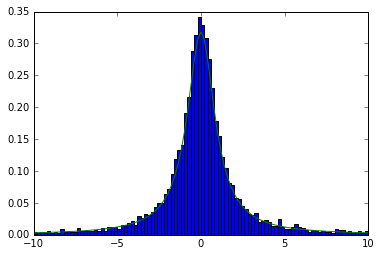

In [3]:
#loi de Cauchy
n=10000
U=rand(n,1)
X=tan(pi*(U-0.5))

a,bins,pacthes=hist(X[(X<10)*(X>-10)],100,normed=1)
plot(bins,1.0/(pi*(1+bins**2)))

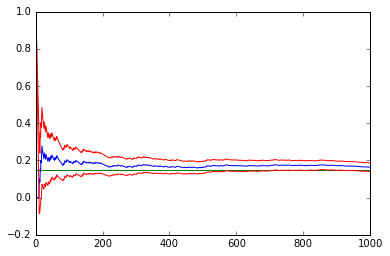

In [8]:
#loi de Cauchy
n=1000
U=rand(n,1)
X=tan(pi*(U-0.5))
Y=X>2
I=ones(n-1)
Conf1=ones(n-1)
Conf2=ones(n-1)

for k in range(1,n-1):
    I[k]=mean(Y[0:k])
    sd=std(Y[0:k])
    if I[k]>0:
        Conf1[k]=I[k]+1.96/sqrt(k)*sd
        Conf2[k]=I[k]-1.96/sqrt(k)*sd


plot(range(1,n),I)
plot(range(1,n),(pi/2-arctan(2))/pi*ones(n-1))
plot(linspace(1,n-1,n-1)[I>0],Conf1[I>0],'r-')
plot(linspace(1,n-1,n-1)[I>0],Conf2[I>0],'r-')

Dans ce cas, les variables aléatoires $\mathbb 1_{X_i \ge 2}$ sont des variables de Bernoulli de paramètre $I$. On peut calculer théoriquement leur variance : $$I(1-I)\sim 0.127$$

### b) Changement de variables

On peut aussi choisir de faire le changement de variable $y=1/x$
$$\int_2^{\infty}\frac{1}{\pi(1+x^2)}dx=\int_0^{1/2} \frac{1}{2\pi(1+y^2)}dy$$

Donc
$$I=\mathbb{E}\left(\frac{1}{2\pi(1+U^2)}\right)\quad U\sim \mathcal{U}[0,1/2]$$

Un second estimateur naturel peut donc être obtenu en prenant $(U_n)$ une suite de variables aléatoires i.i.d sur $[0,1/2]$ et en calculant
$$J_n=\frac{1}{n}\sum_{i=1}^n \frac{1}{2\pi(1+U^2_i)}$$

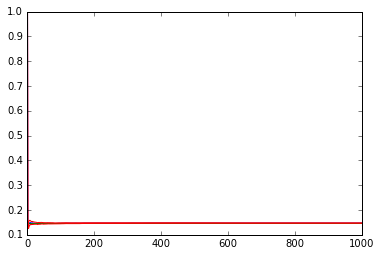

In [9]:

n=1000
J=ones(n-1)
var=ones(n-1)
Confj1=ones(n-1)
Confj2=ones(n-1)
Y=0.5*rand(n-1,1)
Z=1/(2*pi*(1+Y**2))
for k in range(1,n-1):
    J[k]=mean(Z[0:k])
    sd=std(Z[0:k])
    if var[k]>0:
        Confj1[k]=J[k]+1.96/sqrt(k)*sd
        Confj2[k]=J[k]-1.96/sqrt(k)*sd


plot(range(1,n),J)
plot(range(1,n),(pi/2-arctan(2))/pi*ones(n-1))
plot(linspace(1,n-1,n-1)[var>0],Confj1[var>0],'r-')
plot(linspace(1,n-1,n-1)[var>0],Confj2[var>0],'r-')

### c) Comparaisons des méthodes

On peut comparer les intervalles de confiances obtenus par chaque méthode dans les dernières étapes.

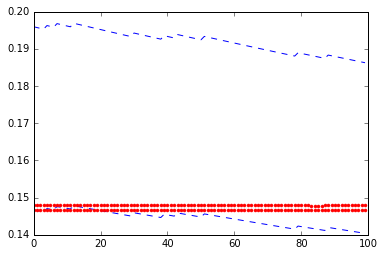

In [10]:
plot(Conf1[899:999],'b--')
plot(Conf2[899:999],'b--')
plot(Confj1[899:999],'r.')
plot(Confj2[899:999],'r.')


En effet, pour la seconde méthode on peut calculer explicitement la variance 

$$Var\left(\frac{1}{2\pi(1+U^2)}\right)=\int_0^{1/2}\left(\frac{1}{2\pi(1+u^2)}\right)^2 du -I^2 \quad\sim 0.951\hspace{0.2cm} 10^{-4}$$